<a href="https://colab.research.google.com/github/Neallaz/Machine-Learning/blob/main/Handwritten%20Digit%20Recognition%20(Image%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(np.int8)


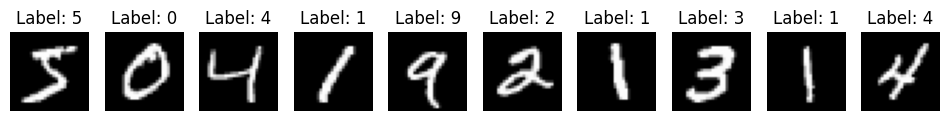

In [6]:
X_np = X.to_numpy()  # or X.values
y_np = y.to_numpy()

def plot_digits(images, labels, n=10):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_digits(X_np, y_np)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()

# Fit on train only
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [11]:
clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

Accuracy: 0.9154285714285715

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



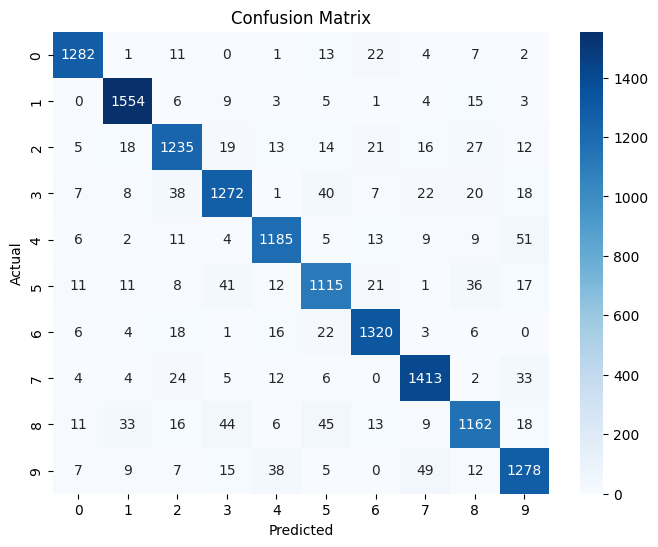

In [12]:
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
